# Wrangle and Analyze Data
#### Case Study with WeRateDogs Twitter Dataset

In [1]:
import json
import requests
from PIL import Image
from io import BytesIO
from functools import reduce

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 280

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set()

## Gather
Due to some issues with the Twitter developer account, I decided to take the shortcut approach instead since it is allowed. On the plus side, it saves time and allows for a cleaner notebook. And I won't be missing much since I used many other APIs in the past.

In [2]:
t_arc_path = "twitter-archive-enhanced.csv"
t_pred_path = "image_predictions.tsv"
t_pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
t_json_path = "tweet_json.txt"

In [3]:
t_arc_df = pd.read_csv(t_arc_path)
t_pred_df = pd.read_csv(t_pred_url, delimiter= '\t')
t_pred_df.to_csv(t_pred_path, sep='\t')
t_json_df = None
with open(t_json_path) as file:
    js = file.read()
    t_json_df = pd.read_json(js, lines=True)[['id','favorite_count','retweet_count']]

## Assess
***

In [4]:
t_arc_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
t_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
t_arc_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
dup = t_arc_df[t_arc_df.duplicated()]
print("Duplicate Rows: {}".format(dup.shape[0]))

Duplicate Rows: 0


In [8]:
t_arc_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
t_arc_df["name"].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Jay          1
Hanz         1
Zeek         1
Iroh         1
Beemo        1
Name: name, Length: 957, dtype: int64

In [10]:
t_arc_df[t_arc_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [11]:
t_arc_df[['source', 'text', 'expanded_urls']].sample(10)

,source,text,expanded_urls
2007,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV,https://twitter.com/dog_rates/status/672264251789176834/photo/1
1052,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maxaroni. He's pumped as hell for the summer. Been working on his beach bod for so long. 10/10 https://t.co/UHvjxm9B0O,"https://twitter.com/dog_rates/status/742528092657332225/photo/1,https://twitter.com/dog_rates/status/742528092657332225/photo/1"
632,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maximus. His face is stuck like that. Tragic really. Great tongue tho. 12/10 would pet firmly https://t.co/xIfrsMNLBR,"https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793962221541933056/photo/1"
1264,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Watson. He's a Suzuki Tickleboop. Leader of a notorious biker gang. Only one ear functional. 12/10 snuggable af https://t.co/R1gLc5vDqG,"https://twitter.com/dog_rates/status/709918798883774466/photo/1,https://twitter.com/dog_rates/status/709918798883774466/photo/1"
1385,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,https://twitter.com/dog_rates/status/700747788515020802/photo/1
1946,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dot. He found out you only pretended to throw the ball that one time. You don't fuck with Dot. 8/10 https://t.co/Ymg4fwKlZd,https://twitter.com/dog_rates/status/673705679337693185/photo/1
2303,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carll. He wants to be a donkey. But also a soccer star. Dreams big. 10/10 https://t.co/SVpNbhaIMk,https://twitter.com/dog_rates/status/666996132027977728/photo/1
2175,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jaspers. He is a northeastern Gillette. Just got his license. Very excited. 10/10 they grow up so fast https://t.co/cieaOI0RuT,https://twitter.com/dog_rates/status/669214165781868544/photo/1
1053,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Was just informed about this hero pupper and others like her. Another 14/10, would be an absolute honor to pet https://t.co/hBTzPmj36Z","https://twitter.com/dog_rates/status/742465774154047488/photo/1,https://twitter.com/dog_rates/status/742465774154047488/photo/1"
380,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tucker. It's his birthday. He's pupset with you because you're too busy playing @GoodDogsGame to celebrate. 13/10 would put down phone https://t.co/vrppizPGdb,https://twitter.com/dog_rates/status/827600520311402496/photo/1


In [12]:
rt1 = t_arc_df["retweeted_status_id"].notnull()
rt2 = t_arc_df["retweeted_status_user_id"].notnull()
rt3 = t_arc_df["text"].str.startswith("RT")

rt4 = (rt1 | rt2 | rt3)
print(rt1.sum(), rt2.sum(), rt3.sum(), rt4.sum())

181 181 183 183


In [13]:
set(t_arc_df["name"].to_list())

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [14]:
wrong_names = ['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']

***

In [15]:
t_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
t_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
t_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
dup = t_pred_df[t_pred_df.duplicated()]
print("Duplicate Rows: {}".format(dup.shape[0]))

Duplicate Rows: 0


***

In [19]:
t_json_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [20]:
t_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
t_json_df.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [22]:
dup = t_json_df[t_json_df.duplicated()]
print("Duplicate Rows: {}".format(dup.shape[0]))

Duplicate Rows: 0


**Observations on quality**
* Incorrect dog names including None and a
* `timestamp` is object, should be `datetime`
* `tweet_id` is `int`, should be `str` 
* Some columns have missing data
* `id` should be renamed `tweet_id` for consistency
* many dogs aren't classified (dogger, pupper ...)
* unusual rating scale, making comparisons difficult
* tables don't have the same number of entries, meaning there are missing lines
* several denominator values, including 0!
* different number of retweets depending on how to filter for it

**Observations on tidiness**
* last 4 columns can be replaced with one
* this data can be combined in 1 table instead of 3
* only predictions with highest pobability are needed
* retweets and replies included but not needed

## Clean

In [23]:
# Make copies before any modification
arc_df = t_arc_df.copy()
pred_df = t_pred_df.copy()
json_df = t_json_df.copy()

**Issue 1**: rename `id` to `tweet_id`

In [24]:
json_df.rename(columns= {'id': 'tweet_id'}, inplace= True)

**Issue 2**: change `tweet_id` types to `str`

In [25]:
arc_df["tweet_id"] = arc_df["tweet_id"].astype(str)
pred_df["tweet_id"] = pred_df["tweet_id"].astype(str)
json_df["tweet_id"] = json_df["tweet_id"].astype(str)

**Issue 3**: join all tables on `tweet_id`

In [26]:
# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
dfs = [arc_df, pred_df, json_df]
df_clean = reduce(lambda left,right: pd.merge(left,right, how = 'inner', on='tweet_id'), dfs)

**Test** for Issues 1-3

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

**Issue 4**: remove rows with `rating_denominator = 0`

In [28]:
df_clean = df_clean[df_clean["rating_denominator"] != 0]

**Issue 5**: calculate a rating score

In [29]:
df_clean['rating_score'] = df_clean['rating_numerator']/df_clean['rating_denominator']

**Test** for issues 4 and 5

In [30]:
df_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_score
count,2.300000e+01,2.300000e+01,7.900000e+01,7.900000e+01,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000,2073.000000
mean,6.978112e+17,4.196984e+09,7.663364e+17,9.967874e+15,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,8556.718283,2976.089243,1.169987
std,4.359384e+16,0.000000e+00,5.882530e+16,8.859637e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,12098.640994,5054.897526,3.988880
min,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000,0.000000
25%,6.732411e+17,4.196984e+09,7.124037e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,1674.000000,634.000000,1.000000
50%,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,3864.000000,1408.000000,1.100000
75%,7.031489e+17,4.196984e+09,8.068680e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,10937.000000,3443.000000,1.200000
max,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,177.600000


**Issue 6**: replace wrong dog names with `None`

In [31]:
for name in df_clean["name"]:
    if name in wrong_names:
        df_clean["name"][df_clean["name"] == name] = 'None'

<ipython-input-31-55ae97d025c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["name"][df_clean["name"] == name] = 'None'


**Test** for issue 6

In [32]:
set(df_clean["name"].to_list())

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert'

**Issue 7**: remove retweets and related columns

In [33]:
rt1 = df_clean["retweeted_status_id"].notnull()
rt2 = df_clean["retweeted_status_user_id"].notnull()
rt3 = df_clean["text"].str.startswith("RT")
rt4 = (rt1 | rt2 | rt3)

df_clean = df_clean[~rt4].drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

**Issue 8**: change `timestamp` type to `datetime` 

In [34]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

**Test** for issues 7-8

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   object             
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   object             
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   int64              
 6   rating_denominator  1993 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               1993 non-null   object             
 9   floofer             1993 non-null   object             
 10  pupper              1993 non-null   object             
 11  puppo               1993 non-null   object             
 12  jpg_url             1993 non-null 

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   object             
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   object             
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   int64              
 6   rating_denominator  1993 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               1993 non-null   object             
 9   floofer             1993 non-null   object             
 10  pupper              1993 non-null   object             
 11  puppo               1993 non-null   object             
 12  jpg_url             1993 non-null 

In [38]:
df_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_score
count,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000,1993.000000
mean,12.281987,10.532363,1.203211,0.594169,1.344274e-01,6.023157e-02,8899.483693,2767.804315,1.169334
std,41.508101,7.322538,0.560899,0.271832,1.007053e-01,5.089784e-02,12215.105135,4675.635994,4.068090
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000,0.000000
25%,10.000000,10.000000,1.000000,0.362925,5.390140e-02,1.619070e-02,1985.000000,624.000000,1.000000
50%,11.000000,10.000000,1.000000,0.587764,1.174020e-01,4.948690e-02,4138.000000,1360.000000,1.100000
75%,12.000000,10.000000,1.000000,0.846628,1.952180e-01,9.157150e-02,11310.000000,3220.000000,1.200000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,177.600000


**Issue 9**: combine `["doggo", "floofer", "pupper", "puppo"]` columns into one as `stage`

**Issue 10**: add new stage [chimera](https://i.imgur.com/WeeuxcC.png) in case of multiple stages,

In [39]:
df_clean["stage"] = "None"

for i, row in df_clean.iterrows():
    dog_rank_set = set(df_clean.loc[i, ["doggo", "floofer", "pupper", "puppo"]].to_list())
    dog_rank_set.discard('None')
    
    if len(dog_rank_set) == 0:
        pass
    elif len(dog_rank_set) == 1:
        df_clean.loc[i, ["stage"]] = dog_rank_set.pop()
    else:
        df_clean.loc[i, ["stage"]] = 'chimera'
        
df_clean = df_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1)

**Test** for issues 9 and 10

In [40]:
df_clean["stage"].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'chimera'],
      dtype=object)

**Final tests**

In [42]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating_score,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,1.3,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,1.3,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,1.2,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,1.3,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,1.2,None


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   object             
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   object             
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   int64              
 6   rating_denominator  1993 non-null   int64              
 7   name                1993 non-null   object             
 8   jpg_url             1993 non-null   object             
 9   img_num             1993 non-null   int64              
 10  p1                  1993 non-null   object             
 11  p1_conf             1993 non-null   float64            
 12  p1_dog              1993 non-null 

In [44]:
df_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_score
count,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000,1993.000000
mean,12.281987,10.532363,1.203211,0.594169,1.344274e-01,6.023157e-02,8899.483693,2767.804315,1.169334
std,41.508101,7.322538,0.560899,0.271832,1.007053e-01,5.089784e-02,12215.105135,4675.635994,4.068090
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000,0.000000
25%,10.000000,10.000000,1.000000,0.362925,5.390140e-02,1.619070e-02,1985.000000,624.000000,1.000000
50%,11.000000,10.000000,1.000000,0.587764,1.174020e-01,4.948690e-02,4138.000000,1360.000000,1.100000
75%,12.000000,10.000000,1.000000,0.846628,1.952180e-01,9.157150e-02,11310.000000,3220.000000,1.200000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,177.600000


## Save

In [45]:
master_df_path = "twitter_archive_master.csv" 
master_df = df_clean.copy()
master_df.to_csv(master_df_path)

## Analysis and Visualisation

### How many submissions are real dogs?

In [46]:
print('True dog percentage: {}%'.format(round(master_df["p1_dog"].sum()/master_df["p1_dog"].count() * 100, 2)))

True dog percentage: 74.06%


### Top 10 rated dogs

In [47]:
top_10 = master_df[['tweet_id', 'name', 'jpg_url', 'stage', 'p1_dog', 'rating_score']].sort_values(by=['rating_score'], ascending=False)
top_10[:10]

,tweet_id,name,jpg_url,stage,p1_dog,rating_score
802,749981277374128128,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,None,False,177.600000
1795,670842764863651840,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,None,False,42.000000
558,786709082849828864,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,True,7.500000
415,810984652412424192,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,None,True,3.428571
614,778027034220126208,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,True,2.700000
1451,680494726643068929,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,True,2.600000
98,870063196459192321,Clifford,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,None,False,1.400000
123,863079547188785154,None,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,None,True,1.400000
117,864873206498414592,None,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,None,False,1.400000
431,807621403335917568,Ollie,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,pupper,True,1.400000


In [48]:
imgs = []
for i, row in top_10[:10].iterrows():
    res = requests.get(row['jpg_url'])
    img = Image.open(BytesIO(res.content))
    imgs.append(img)

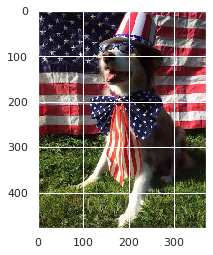

In [49]:
plt.imshow(imgs[0]);

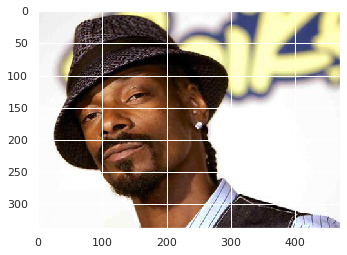

In [50]:
plt.imshow(imgs[1]);

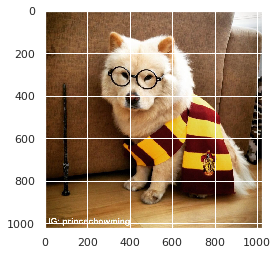

In [51]:
plt.imshow(imgs[2]);

* Even for top dogs, not all are real
* Seems like the dog detection model is not always reliable

### At which stage does a dog get better ratings?

In [52]:
master_df[['stage','rating_score']].groupby(['stage']).mean().sort_values(by = ['rating_score'], ascending= False)

,rating_score
stage,
puppo,1.200000
floofer,1.200000
doggo,1.188889
None,1.180192
chimera,1.118182
pupper,1.071429


### Source of submissions

In [53]:
master_df["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [54]:
round(master_df["source"].value_counts()/master_df["source"].count() * 100,2)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     98.04
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      1.40
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     0.55
Name: source, dtype: float64

### Retweet vs Favorite Count

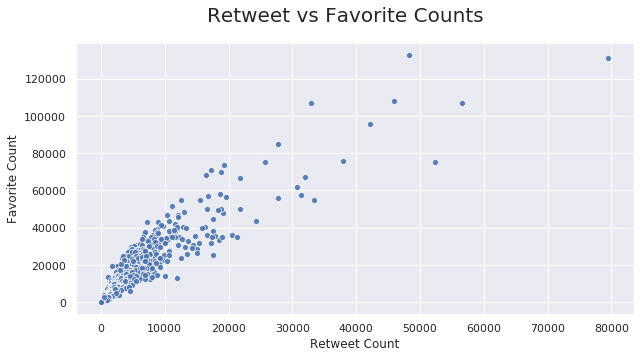

In [55]:
f = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x='retweet_count', y="favorite_count", data=master_df, alpha = 0.9)
ax.set(ylabel="Favorite Count")
ax.set(xlabel="Retweet Count")
f.suptitle('Retweet vs Favorite Counts', fontsize=20);

### Rating Distribution

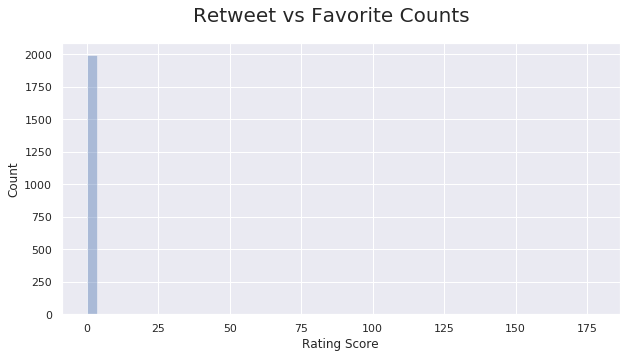

In [56]:
f, ax = plt.subplots(figsize=(10, 5))
sns.distplot(master_df['rating_score'], color="b", kde=False);
ax.set(ylabel="Count")
ax.set(xlabel="Rating Score")
f.suptitle('Retweet vs Favorite Counts', fontsize=20);
plt.show()

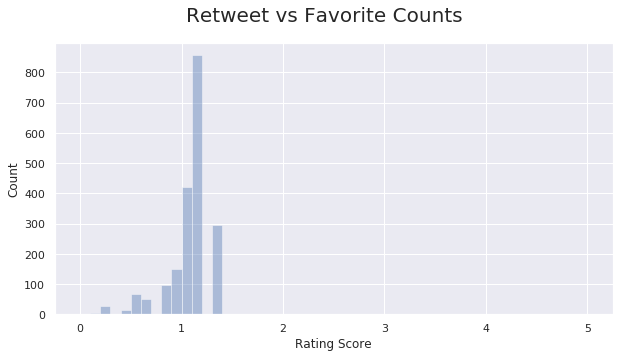

In [57]:
f, ax = plt.subplots(figsize=(10, 5))
sns.distplot(master_df['rating_score'], color="b", kde=False, hist_kws={"range": [0,5]});
ax.set(ylabel="Count")
ax.set(xlabel="Rating Score")
f.suptitle('Retweet vs Favorite Counts', fontsize=20);
plt.show()